<a href="https://colab.research.google.com/github/paulynamagana/AFDB_notebooks/blob/main/AFDB_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Accessing AlphaFold DB structures through BigQuery**

### **Introduction**
<img src="https://www.vectorlogo.zone/logos/google_bigquery/google_bigquery-icon.svg" height="200" align="right">

The metadata for all ~214 million predicted structure models from AlphaFold can be accessed with BigQuery.

**IMPORTANT: The free tier of Google Cloud comes with BigQuery Sandbox with 1 TB of free processed query data each month. Repeated queries within a month could exceed this limit and if you have upgraded to a paid Cloud Billing account you may be charged.**

*This should be sufficient for running a number of queries on the metadata table, though the usage depends on the size of the columns queried and selected. Please look at the BigQuery pricing page for more information. This is the user's responsibility so please ensure you keep track of your billing settings and resource usage in the console.*

**IMPORTANT:** <br>
Before we get started, it's important to note that you will need to carefully follow the provided instructions that will help you set up the required environment and configure the necceasary dependencies. Make sure you have access to a Google account, as we will be using Google Colab and BigQuery.


<br>

In order to customise the code you will need to **Save a copy** of this Notebook to your Drive. You can visit this resource [Query Syntax](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#select_list) for further information about SQL queries in GoogleSQL for BigQuery.





---
## Before you start, set up BigQuery <a name="Set up Big Query"></a>

Before you start running any code below, follow the BigQuery Sandbox [Set up guide](https://cloud.google.com/bigquery/docs/sandbox). The link also discusses options to upgrade if the limited capabilities are not enough for your work. Moreover, it highlights the limitations of this sandbox.

To set up a BigQuery Sandbox and get started with accessing AlphaFold DB structures, follow these instructions:

1. Log in to your Google Account, if you don't have a Google account, create one by clicking on "Create account" and following the on-screen instructions.
2. Go to the [BigQuery page](https://console.cloud.google.com/bigquery)
. Start using the sandbox by creating a project name of your choice (follow instructions in the link above). </br>
  *Important Note: When setting up your BigQuery Sandbox, please be aware that it does not accept names with spaces or underscores. Make sure to choose names that consist of alphanumeric characters only and separate words with dashes.*
3. Copy your `project-id` to use in the cell to Authenticate and create a client to access BigQuery.




---



## How to use Google Colab <a name="How to use GoogleColab"></a>
1. To run a code cell, click on the cell to select it. You will notice a play button (▶️) on the left side of the cell. Click on the play button or press Shift+Enter to **run** the code in the selected cell.
2. The code will start executing, and you will see the output, if any, displayed below the code cell.
3. Move to the next code cell and repeat steps 2 and 3 until you have executed all the desired code cells in sequence.
4. The currently running step is indicated by a circle with a stop sign next to it.
If you need to stop or interrupt the execution of a code cell, you can click on the stop button (■) located next to the play button.

*Remember to run the code cells in the correct order, as their execution might depend on variables or functions defined in previous cells. You can modify the code in a code cell and re-run it to see updated results.*



In [ ]:
#@title #Change `project_id` and run this cell
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
data_table.enable_dataframe_formatter()
import pandas as pd


# Authenticate and create a client to access BigQuery
auth.authenticate_user()
project_id = "serious-energy-400810" #@param {type:"string"}
#@markdown `project_id` is not the same as project name. To see the `project_id` visit your [dashboard](https://console.cloud.google.com/cloud-resource-manager?)

client = bigquery.Client(project=project_id)


def execute_bigquery_and_create_dataframe(query):
    """
    Execute a BigQuery query, parse the results, and create a pandas DataFrame.

    Parameters:
    - query (str): The SQL query to be executed.
    - client: The BigQuery client.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the query results.
    """
    # Execute the query and retrieve the results using BigQuery client
    client = bigquery.Client(project=project_id)
    query_job = client.query(query)
    results = query_job.result()

    # Parse the results and store them as a list of dictionaries
    data = [dict(row) for row in results]

    # Create a pandas DataFrame to view the results as a table
    df = pd.DataFrame(data)

    # Display the DataFrame for visualization
    display(df)

    return df


## 1.1.&nbsp;  Data Types
The code blocks below query the column names and their respective data types of the entire table. This ensures the column names are up-to-date and also facilitates a clear view of the metadata table's structure, for subseqeunt new queries. Moreover, this also tests if your setup is working correctly.

In [ ]:
# This SQL query retrieves the column names and corresponding data types for the 'metadata' table
query = """
SELECT column_name, data_type

FROM bigquery-public-data.deepmind_alphafold.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'metadata'
"""

#Big Query
query = execute_bigquery_and_create_dataframe(query)

,column_name,data_type
0,allVersions,ARRAY<INT64>
1,latestVersion,INT64
2,organismCommonNames,ARRAY<STRING>
3,uniprotEnd,INT64
4,proteinShortNames,ARRAY<STRING>
5,uniprotStart,INT64
6,fractionPlddtConfident,FLOAT64
7,organismSynonyms,ARRAY<STRING>
8,fractionPlddtVeryHigh,FLOAT64
9,proteinFullNames,ARRAY<STRING>


You can read the description of each column, observed below in your query.

|**Column name**	| **Data type** |	**Description**|
---------|-----------|--------------------- |
|allVersions|	ARRAY <INT64>|	An array of AFDB versions this prediction has had
|entryId	| STRING	| The AFDB entry ID, e.g. "AF-Q1HGU3-F1"|
|fractionPlddtConfident	|FLOAT64	|Fraction of the residues in the prediction with pLDDT between 70 and 90|
|fractionPlddtLow	|FLOAT64	|Fraction of the residues in the prediction with pLDDT between 50 and 70|
|fractionPlddtVeryHigh	|FLOAT64	|Fraction of the residues in the prediction with pLDDT greater than 90|
|fractionPlddtVeryLow	|FLOAT64	|Fraction of the residues in the prediction with pLDDT less than 50|
|globalMetricValue	|FLOAT64	|The mean pLDDT of this prediction|
|isReferenceProteome	|BOOL	|Is this protein part of the reference proteome?
|isReviewed	|BOOL|	Has this protein been reviewed, i.e. is it part of SwissProt?|
|latestVersion	|INT64|	The latest AFDB version for this prediction
|modelCreatedDate	|DATE	|The date of creation for this entry, e.g. "2022-06-01"
|organismCommonNames	|ARRAY<STRING>|	List of common organism names
|organismScientificName	|STRING|	The scientific name of the organism
|organismSynonyms	|ARRAY<STRING>	|List of synonyms for the organism
|proteinFullNames	|ARRAY<STRING>	|Full names of the protein
|proteinShortNames	|ARRAY<STRING>|	Short names of the protein
|sequenceChecksum	|STRING	|CRC64 hash of the sequence. Can be used for cheaper lookups.
|sequenceVersionDate	|DATE	|Date when the sequence data was last modified in UniProt

<br>

For more detailed information, check the [GitHub repository](https://github.com/deepmind/alphafold/blob/main/afdb/README.md#exploring-the-metadata)



## 1.2.&nbsp;  Basic Query
Now, we can start querying for specific entries to work with, depending on the data you require for downstream purposes. To explore the data, this next query will return the first 10 entries to view the data for them.

In [ ]:
## SQL query to retrieve a limited set of data from the AlphaFold metadata table
query = """
SELECT *

FROM `bigquery-public-data.deepmind_alphafold.metadata` --DATASET
LIMIT 10 --LIMIT THE QUERY
"""

execute_bigquery_and_create_dataframe(query)

,allVersions,latestVersion,organismCommonNames,uniprotEnd,proteinShortNames,uniprotStart,fractionPlddtConfident,organismSynonyms,fractionPlddtVeryHigh,proteinFullNames,...,uniprotId,modelCreatedDate,fractionPlddtVeryLow,sequenceVersionDate,entryId,geneSynonyms,uniprotSequence,gene,isReferenceProteome,isReviewed
0,"[3, 4]",4,[Yellowfever mosquito],429,[],1,0.434,[Culex aegypti],0.294,[],...,Q1HQW6_AEDAE,2022-06-01,0.056,2006-06-13,AF-Q1HQW6-F1,[],MKEKNRHISMKTKAAWRKNINISDVDSFLEEQRQEERIGTVADKSD...,AAEL012235,False,False
1,"[3, 4]",4,[],514,[],1,0.070,[],0.926,[],...,Q1JTS1_9NEOP,2022-06-01,0.002,2006-06-13,AF-Q1JTS1-F1,[],MLLQKWLFSTNHKDIGTLYFIFGIWSGMMGSSLSLMIRAELGNPGS...,COI,False,False
2,"[3, 4]",4,[],108,[],1,0.370,[],0.611,[],...,Q1HID3_9ZZZZ,2022-06-01,0.000,2006-06-13,AF-Q1HID3-F1,[],STRLILHAKAQDTILSLAAEAGSVEDLELEDVMKIGYKDIRCVESG...,nifH,False,False
3,"[3, 4]",4,[],113,[],1,0.540,[],0.319,[],...,Q1IGT6_PSEE4,2022-06-01,0.027,2006-06-13,AF-Q1IGT6-F1,[],MFYVQRDAEGQLLRVEAAAFDGFTDMVPADNAEIQEWFADDVVENS...,PSEEN0140,True,False
4,"[3, 4]",4,[],715,[],1,0.180,[],0.694,[],...,Q1IT61_KORVE,2022-06-01,0.092,2006-06-13,AF-Q1IT61-F1,[],MLVAQFLCRSGWILNIGIQACKNILENERSGFHLVRFAALVLCLPA...,Acid345_0936,True,False
5,"[3, 4]",4,[],100,[],1,0.190,[],0.730,[],...,Q1ILM3_KORVE,2022-06-01,0.030,2006-06-13,AF-Q1ILM3-F1,[],MLCEHLHPLEEAIAAVGIRETFRGAAWSKNCREWVYFDCYLELAAI...,Acid345_3226,True,False
6,"[3, 4]",4,[],275,[],1,0.167,[],0.655,[],...,Q1IJ66_KORVE,2022-06-01,0.109,2006-06-13,AF-Q1IJ66-F1,[],MSDSTEVRDQHQHRRLSAQEWEQQWQRTWKESGKMAYEINATDEHS...,Acid345_4084,True,False
7,"[3, 4]",4,[],213,[],1,0.164,[],0.793,[],...,Q1INA1_KORVE,2022-06-01,0.028,2006-06-13,AF-Q1INA1-F1,[],MTRAPGFCGVILSAGASSRMGRDKALLPWPADLVHPTTWRQTFLGA...,Acid345_2648,True,False
8,"[3, 4]",4,[],448,[],1,0.022,[],0.902,[],...,Q1INW0_KORVE,2022-06-01,0.071,2006-06-13,AF-Q1INW0-F1,[],MTQTSIKFVSLPFLLFVLITVFTLAEPKSPNANSAAELNKHGEELL...,Acid345_2439,True,False
9,"[3, 4]",4,[],128,[],1,0.727,[],0.195,[],...,Q1IUG2_KORVE,2022-06-01,0.008,2006-06-13,AF-Q1IUG2-F1,[],MAYSEKVLDHYSNPRNVGSMDKNSAEVGTGLVGAPECGDVMKLQIK...,Acid345_0483,True,False


,allVersions,latestVersion,organismCommonNames,uniprotEnd,proteinShortNames,uniprotStart,fractionPlddtConfident,organismSynonyms,fractionPlddtVeryHigh,proteinFullNames,...,uniprotId,modelCreatedDate,fractionPlddtVeryLow,sequenceVersionDate,entryId,geneSynonyms,uniprotSequence,gene,isReferenceProteome,isReviewed
0,"[3, 4]",4,[Yellowfever mosquito],429,[],1,0.434,[Culex aegypti],0.294,[],...,Q1HQW6_AEDAE,2022-06-01,0.056,2006-06-13,AF-Q1HQW6-F1,[],MKEKNRHISMKTKAAWRKNINISDVDSFLEEQRQEERIGTVADKSD...,AAEL012235,False,False
1,"[3, 4]",4,[],514,[],1,0.070,[],0.926,[],...,Q1JTS1_9NEOP,2022-06-01,0.002,2006-06-13,AF-Q1JTS1-F1,[],MLLQKWLFSTNHKDIGTLYFIFGIWSGMMGSSLSLMIRAELGNPGS...,COI,False,False
2,"[3, 4]",4,[],108,[],1,0.370,[],0.611,[],...,Q1HID3_9ZZZZ,2022-06-01,0.000,2006-06-13,AF-Q1HID3-F1,[],STRLILHAKAQDTILSLAAEAGSVEDLELEDVMKIGYKDIRCVESG...,nifH,False,False
3,"[3, 4]",4,[],113,[],1,0.540,[],0.319,[],...,Q1IGT6_PSEE4,2022-06-01,0.027,2006-06-13,AF-Q1IGT6-F1,[],MFYVQRDAEGQLLRVEAAAFDGFTDMVPADNAEIQEWFADDVVENS...,PSEEN0140,True,False
4,"[3, 4]",4,[],715,[],1,0.180,[],0.694,[],...,Q1IT61_KORVE,2022-06-01,0.092,2006-06-13,AF-Q1IT61-F1,[],MLVAQFLCRSGWILNIGIQACKNILENERSGFHLVRFAALVLCLPA...,Acid345_0936,True,False
5,"[3, 4]",4,[],100,[],1,0.190,[],0.730,[],...,Q1ILM3_KORVE,2022-06-01,0.030,2006-06-13,AF-Q1ILM3-F1,[],MLCEHLHPLEEAIAAVGIRETFRGAAWSKNCREWVYFDCYLELAAI...,Acid345_3226,True,False
6,"[3, 4]",4,[],275,[],1,0.167,[],0.655,[],...,Q1IJ66_KORVE,2022-06-01,0.109,2006-06-13,AF-Q1IJ66-F1,[],MSDSTEVRDQHQHRRLSAQEWEQQWQRTWKESGKMAYEINATDEHS...,Acid345_4084,True,False
7,"[3, 4]",4,[],213,[],1,0.164,[],0.793,[],...,Q1INA1_KORVE,2022-06-01,0.028,2006-06-13,AF-Q1INA1-F1,[],MTRAPGFCGVILSAGASSRMGRDKALLPWPADLVHPTTWRQTFLGA...,Acid345_2648,True,False
8,"[3, 4]",4,[],448,[],1,0.022,[],0.902,[],...,Q1INW0_KORVE,2022-06-01,0.071,2006-06-13,AF-Q1INW0-F1,[],MTQTSIKFVSLPFLLFVLITVFTLAEPKSPNANSAAELNKHGEELL...,Acid345_2439,True,False
9,"[3, 4]",4,[],128,[],1,0.727,[],0.195,[],...,Q1IUG2_KORVE,2022-06-01,0.008,2006-06-13,AF-Q1IUG2-F1,[],MAYSEKVLDHYSNPRNVGSMDKNSAEVGTGLVGAPECGDVMKLQIK...,Acid345_0483,True,False


##1.3 Advanced Query



###1.3.1&nbsp; Retrieve prediction confidence fractions per species.

However, this query has been limited to the top 29 species according to the num_predictions as it  may take time to retrieve the full grouped dataset.

In [ ]:
query= """SELECT
          organismScientificName AS name,
          SUM(fractionPlddtVeryLow) / COUNT(fractionPlddtVeryLow) AS mean_plddt_very_low,
          SUM(fractionPlddtLow) / COUNT(fractionPlddtLow) AS mean_plddt_low,
          SUM(fractionPlddtConfident) / COUNT(fractionPlddtConfident) AS mean_plddt_confident,
          SUM(fractionPlddtVeryHigh) / COUNT(fractionPlddtVeryHigh) AS mean_plddt_very_high,
          COUNT(organismScientificName) AS num_predictions

    FROM bigquery-public-data.deepmind_alphafold.metadata
    GROUP BY name
    ORDER BY num_predictions DESC
    LIMIT 30
"""

df= execute_bigquery_and_create_dataframe(query)

,name,mean_plddt_very_low,mean_plddt_low,mean_plddt_confident,mean_plddt_very_high,num_predictions
0,Acidobacteria bacterium,0.089714,0.100252,0.220046,0.589985,1066443
1,Chloroflexi bacterium,0.074611,0.088021,0.210647,0.626718,1018842
2,Actinobacteria bacterium,0.062034,0.083169,0.204845,0.649948,924571
3,Gammaproteobacteria bacterium,0.062937,0.082206,0.210893,0.643962,889963
4,Escherichia coli,0.079160,0.122607,0.249195,0.549035,864366
5,Deltaproteobacteria bacterium,0.084659,0.094105,0.223174,0.598061,809761
6,marine sediment metagenome,0.137732,0.180879,0.249305,0.432082,666660
7,Mesorhizobium sp,0.056018,0.093542,0.203185,0.647253,664158
8,Helicobacter pylori,0.075897,0.098938,0.232671,0.592496,552054
9,Bacteroidetes bacterium,0.065017,0.082766,0.222274,0.629940,485548


NameError: name 'df' is not defined

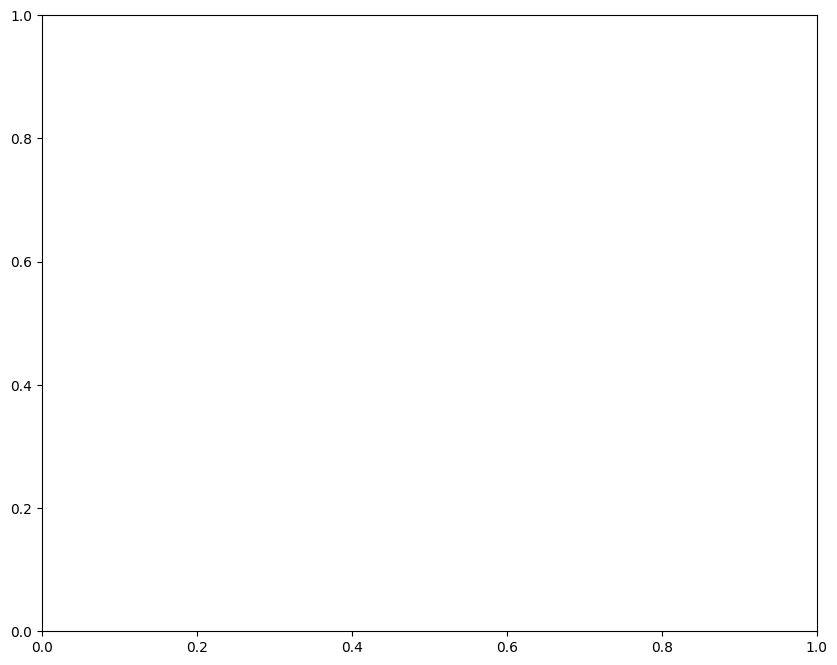

In [ ]:
#@title Plot confidence fractions per species
#import libraries
import matplotlib.pyplot as plt
import numpy as np

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define custom colors
custom_colors = {'mean_plddt_very_low': 'orange', 'mean_plddt_low': '#FFFF00', 'mean_plddt_confident': '#1aa7ec', 'mean_plddt_very_high': '#1e2f97'}

# Create a stacked bar plot
bottom = np.zeros(len(df['name']))
for category in custom_colors.keys():
    ax.barh(df['name'], df[category], color=custom_colors.get(category, 'gray'), label=category.split('_')[-1].capitalize(), left=bottom)
    bottom += df[category]

# Customize the plot
ax.set_title('PLDDT distribution by Organism')
ax.set_xlabel('pLDDT distribution ')
ax.set_ylabel('Organism Name')
ax.legend(loc='upper right')

# Show the plot
plt.show()


###1.3.2&nbsp; Retrieve proteins from a specific gene name for all organisms

In this case we're retrieving only the information from the next columns:

* organismScientificName
* globalMetricValue
* uniprotId
* entryId
* modelCreatedDate
* latestVersion
* sequenceVersionDate
* uniprotSequence

You can modify the query accordingly, look for the comment `-- COLUMNS TO RETRIEVE`

In [ ]:
# Define the query
query= """SELECT organismScientificName, globalMetricValue, uniprotId, entryId, modelCreatedDate, latestVersion, sequenceVersionDate, uniprotSequence, --COLUMNS TO RETRIEVE
  FROM bigquery-public-data.deepmind_alphafold.metadata --DATASET

  WHERE organismScientificName = "Nosema ceranae"
  """

df =execute_bigquery_and_create_dataframe(query)

,organismScientificName,globalMetricValue,uniprotId,entryId,modelCreatedDate,latestVersion,sequenceVersionDate,uniprotSequence
0,Nosema ceranae,59.47,W0FYE2_9MICR,AF-W0FYE2-F1,2022-06-01,4,2014-03-19,TPPAVATDIINERAKIKDAVEQRRSFVQNNGPEIAHLVAENTKLIQ...
1,Nosema ceranae,52.34,F6M7Y5_9MICR,AF-F6M7Y5-F1,2022-06-01,4,2011-07-27,IAISETPTESQKEPMINSLENVSEDQIMNTYIENTIAEGRTKNKAG...
2,Nosema ceranae,51.97,F6M7Y6_9MICR,AF-F6M7Y6-F1,2022-06-01,4,2011-07-27,IAISETPTESQKEPMINSLENVSEDQIMNTYIENTIAEGRTKNKAG...
3,Nosema ceranae,87.69,A0A3Q8ECP6_9MICR,AF-A0A3Q8ECP6-F1,2022-06-01,4,2019-04-10,GFSGCGNKQPVIKKEGMGLVAFMKGEEDSDGKVILNGERVHNILKK...
4,Nosema ceranae,92.88,A0A0A7NP42_9MICR,AF-A0A0A7NP42-F1,2022-06-01,4,2015-03-04,TTAEKEIVRDIKEKLCYVSADYEEDVKNNSLLSSITKNYEMPDGQI...
...,...,...,...,...,...,...,...,...
3574,Nosema ceranae,75.94,A0A0F9ZD01_9MICR,AF-A0A0F9ZD01-F1,2022-06-01,4,2015-07-22,MEEYETIEHDMIHIKDYFKNYKFGIQERLSKLYFLNNMNTNMINDS...
3575,Nosema ceranae,39.12,A0A0F9Z869_9MICR,AF-A0A0F9Z869-F1,2022-06-01,4,2015-07-22,MYGKPIKRKITKKCNNDKELYHKENDDESKVCMVDIEFKRIKMGFE...
3576,Nosema ceranae,58.03,A0A0F9ZD41_9MICR,AF-A0A0F9ZD41-F1,2022-06-01,4,2015-07-22,MQTFVRLGKQLNRLGSLTRKTMLLFLPSEKNDIDSKKHPFGVEP
3577,Nosema ceranae,84.62,A0A0F9Z951_9MICR,AF-A0A0F9Z951-F1,2022-06-01,4,2015-07-22,MSHRINIECTSEVGAYLTLSNNYCLVGELRSKNTLKYLLENLDMPV...


### 1.3.3&nbsp;  Create a subset with pLDDT <70 for an Organism
The next query involves creating subsets of proteins according to various criteria. For example, the next query below only includes proteins from *Homo sapiens* for which over half the residues are confident or better (>70 pLDDT).

In [ ]:
# Define the query with LIMIT clause
#YOU CAN MODIFY THE QUERY ACCORDING TO YOUR NEEDS
query = """
    SELECT entryId,  modelCreatedDate, uniprotId, uniprotDescription, sequenceVersionDate
    FROM bigquery-public-data.deepmind_alphafold.metadata -- DATASET

    WHERE organismScientificName = "Staphylococcus aureus" -- ORGANISM TO SEARCH
      AND (fractionPlddtVeryHigh + fractionPlddtConfident) > 0.5 -- FILTER BY PLDDT
      AND isReviewed IS True
    LIMIT 30  -- LIMIT TO 10 QUERIES
    -----
"""

## Where fractionPlddtVeryHigh == Fraction of the residues in the prediction with pLDDT greater than 90
##fractionPlddtConfident ==	Fraction of the residues in the prediction with pLDDT between 70 and 90

df= execute_bigquery_and_create_dataframe(query)

,entryId,modelCreatedDate,uniprotId,uniprotDescription,sequenceVersionDate
0,AF-P0C1S2-F1,2022-06-01,NRDI_STAAU,Protein NrdI,2006-07-25
1,AF-P0C5D2-F1,2022-06-01,PTPA_STAAU,Low molecular weight protein-tyrosine-phosphat...,2007-09-11
2,AF-P0A0C3-F1,2022-06-01,REPB_STAAU,Replication protein,1987-08-13
3,AF-P13955-F1,2022-06-01,DYRA_STAAU,Dihydrofolate reductase type 1 from Tn4003,2007-01-23
4,AF-P22874-F1,2022-06-01,MERR_STAAU,Mercuric resistance operon regulatory protein,1991-08-01
5,AF-Q9AGR3-F1,2022-06-01,SYFB_STAAU,Phenylalanine--tRNA ligase beta subunit,2001-06-01
6,AF-P0A0L2-F1,2022-06-01,ETXA_STAAU,Enterotoxin type A,2005-02-15
7,AF-P37375-F1,2022-06-01,TNPE_STAAU,Transposase B from transposon PsiTn554,1994-10-01
8,AF-P0C1Q0-F1,2022-06-01,FEMX_STAAU,Lipid II:glycine glycyltransferase,2006-07-25
9,AF-P0C1U8-F1,2022-06-01,SSPA_STAAU,Glutamyl endopeptidase,2006-09-05


,entryId,modelCreatedDate,uniprotId,uniprotDescription,sequenceVersionDate
0,AF-P0C1S2-F1,2022-06-01,NRDI_STAAU,Protein NrdI,2006-07-25
1,AF-P0C5D2-F1,2022-06-01,PTPA_STAAU,Low molecular weight protein-tyrosine-phosphat...,2007-09-11
2,AF-P0A0C3-F1,2022-06-01,REPB_STAAU,Replication protein,1987-08-13
3,AF-P13955-F1,2022-06-01,DYRA_STAAU,Dihydrofolate reductase type 1 from Tn4003,2007-01-23
4,AF-P22874-F1,2022-06-01,MERR_STAAU,Mercuric resistance operon regulatory protein,1991-08-01
5,AF-Q9AGR3-F1,2022-06-01,SYFB_STAAU,Phenylalanine--tRNA ligase beta subunit,2001-06-01
6,AF-P0A0L2-F1,2022-06-01,ETXA_STAAU,Enterotoxin type A,2005-02-15
7,AF-P37375-F1,2022-06-01,TNPE_STAAU,Transposase B from transposon PsiTn554,1994-10-01
8,AF-P0C1Q0-F1,2022-06-01,FEMX_STAAU,Lipid II:glycine glycyltransferase,2006-07-25
9,AF-P0C1U8-F1,2022-06-01,SSPA_STAAU,Glutamyl endopeptidase,2006-09-05


###1.3.4&nbsp;   Prepare query for download

You can customise the next query to download the specific data from a query that you have tuned for your specific requirements.

Look for the comment `CHANGE THE NEXT LINES OF THE QUERY` and paste your query, make sure you **do not** include the `SELECT` statement.


In [ ]:
# Define the query with LIMIT clause
#YOU CAN MODIFY THE QUERY ACCORDING TO YOUR NEEDS
query = """
with file_rows AS (
  with file_cols AS (
    SELECT
      CONCAT(entryID, '-model_v4.cif') as m,
      CONCAT(entryID, '-predicted_aligned_error_v4.json') as p
    FROM bigquery-public-data.deepmind_alphafold.metadata

    ---- CHANGE THE NEXT LINES OF THE QUERY TO YOUR SPECIFIC QUERY
    WHERE organismScientificName = "Homo sapiens" -- ORGANISM TO SEARCH
      AND (fractionPlddtVeryHigh + fractionPlddtConfident) > 0.5 -- FILTER BY PLDDT
    LIMIT 10  -- Limit the query to the first 10 entries
    -----

  )
  SELECT * FROM file_cols UNPIVOT (files for filetype in (m, p))
)
SELECT CONCAT('gs://public-datasets-deepmind-alphafold-v4/', files) as files
from file_rows
"""

## Where fractionPlddtVeryHigh == Fraction of the residues in the prediction with pLDDT greater than 90
##fractionPlddtConfident ==	Fraction of the residues in the prediction with pLDDT between 70 and 90

# Execute the query
query_job = client.query(query)

# Fetch the query results
results = query_job.result()

# Create a list to store the results
file_list = []
# Iterate over the results and extract the "files" column value
for row in results:
    file_list.append(row["files"])

for entry in file_list:
  print(entry)

gs://public-datasets-deepmind-alphafold-v4/AF-C4VC84-F1-model_v4.cif
gs://public-datasets-deepmind-alphafold-v4/AF-C4VC84-F1-predicted_aligned_error_v4.json
gs://public-datasets-deepmind-alphafold-v4/AF-C4VA57-F1-model_v4.cif
gs://public-datasets-deepmind-alphafold-v4/AF-C4VA57-F1-predicted_aligned_error_v4.json
gs://public-datasets-deepmind-alphafold-v4/AF-C4V7G3-F1-model_v4.cif
gs://public-datasets-deepmind-alphafold-v4/AF-C4V7G3-F1-predicted_aligned_error_v4.json
gs://public-datasets-deepmind-alphafold-v4/AF-C4VBY6-F1-model_v4.cif
gs://public-datasets-deepmind-alphafold-v4/AF-C4VBY6-F1-predicted_aligned_error_v4.json
gs://public-datasets-deepmind-alphafold-v4/AF-C4V9B5-F1-model_v4.cif
gs://public-datasets-deepmind-alphafold-v4/AF-C4V9B5-F1-predicted_aligned_error_v4.json


In [ ]:
#@title Save files to Google Drive
#@markdown **Note:** this block of code will download all the files listed from the previous code to your Google Drive into a folder called "AFDB_BigQuery".
import os
from google.colab import drive

drive.mount('/content/drive')
destination_path = '/content/drive/MyDrive/AFDB_BigQuery'

# Check whether the specified path exists or not
isExist = os.path.exists(destination_path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(destination_path)
    print("The new directory is created!")

# Function to download a file from Google Cloud Storage and save it to the destination
def download_gs_file(gs_url, dest_path):
    # Extract the filename from the GS URL
    filename = os.path.basename(gs_url)

    # Use gsutil to copy the file from GS to the destination path
    copy_command = f"gsutil cp {gs_url} {os.path.join(dest_path, filename)}"

    # Execute the gsutil command
    os.system(copy_command)
    print("Downloaded:", filename)

# Run this code to download the structures from Google Cloud Storage
for structure in file_list:
    # Use the download function to copy files from GS to the destination
    download_gs_file(structure, destination_path)


Mounted at /content/drive
The new directory is created!
Downloaded: AF-C4VC84-F1-model_v4.cif
Downloaded: AF-C4VC84-F1-predicted_aligned_error_v4.json
Downloaded: AF-C4VA57-F1-model_v4.cif
Downloaded: AF-C4VA57-F1-predicted_aligned_error_v4.json
Downloaded: AF-C4V7G3-F1-model_v4.cif
Downloaded: AF-C4V7G3-F1-predicted_aligned_error_v4.json
Downloaded: AF-C4VBY6-F1-model_v4.cif
Downloaded: AF-C4VBY6-F1-predicted_aligned_error_v4.json
Downloaded: AF-C4V9B5-F1-model_v4.cif
Downloaded: AF-C4V9B5-F1-predicted_aligned_error_v4.json


## Contact us

If you experience any bugs please contact afdbhelp@ebi.ac.uk




---

